<a href="https://colab.research.google.com/github/DongExxn/2023S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd ./drive/MyDrive/Colab Notebooks/HW2_DataSet

/content/drive/MyDrive/Colab Notebooks/HW2_DataSet


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [4]:
df = pd.read_csv('train.csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [7]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

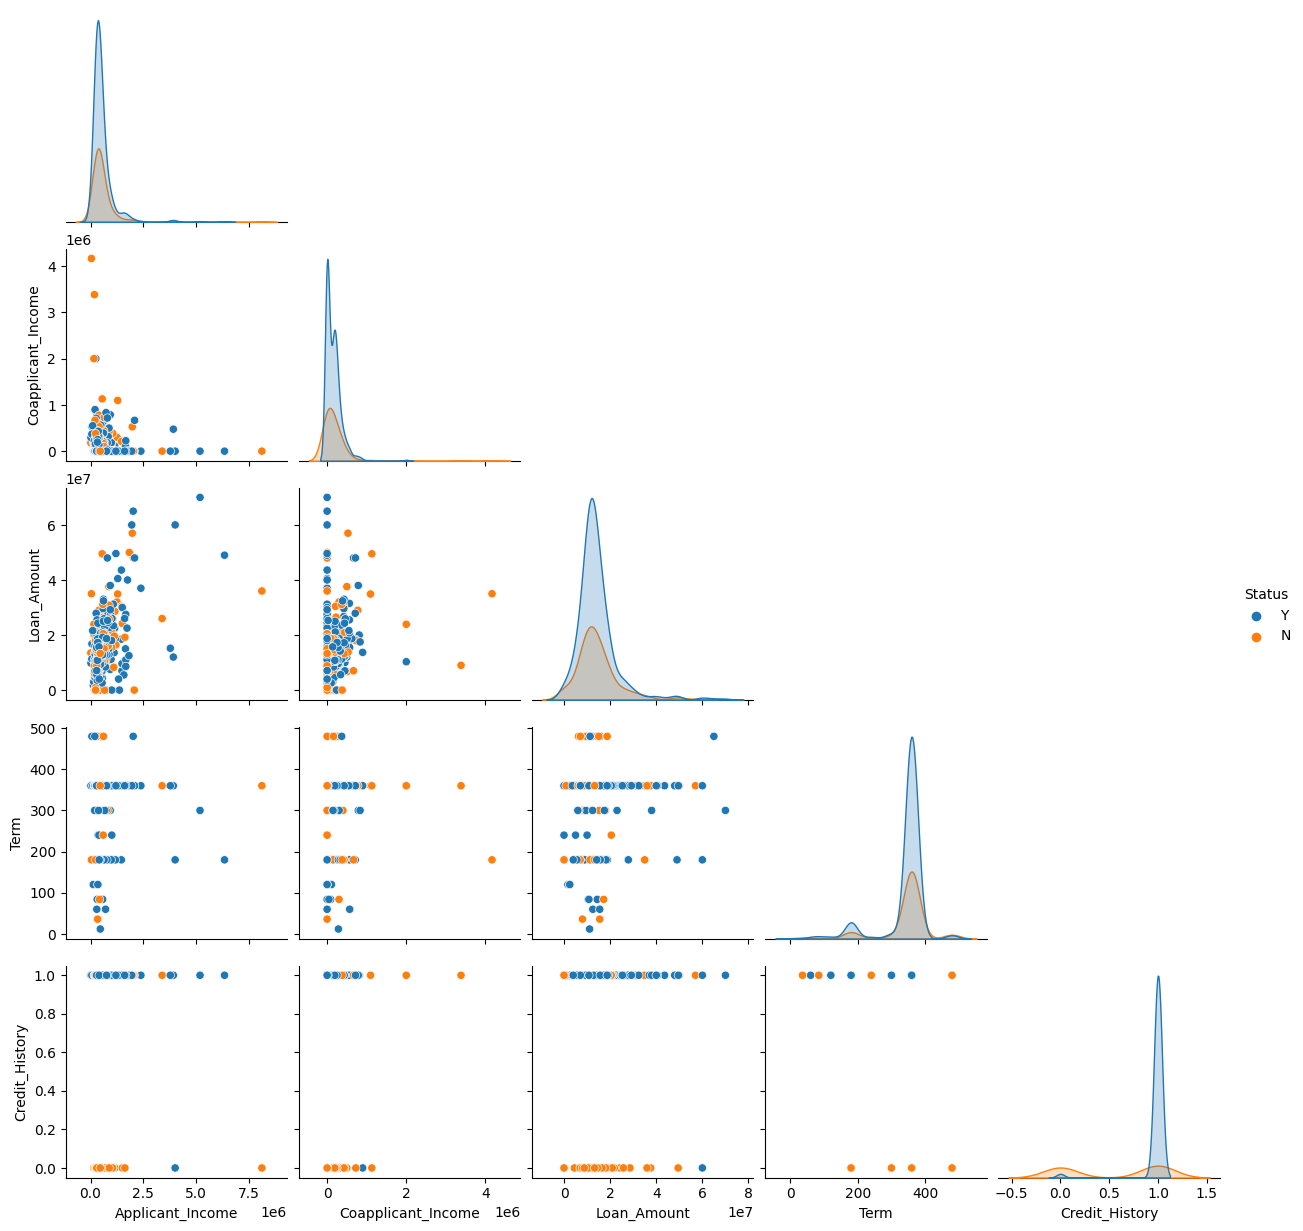

In [9]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

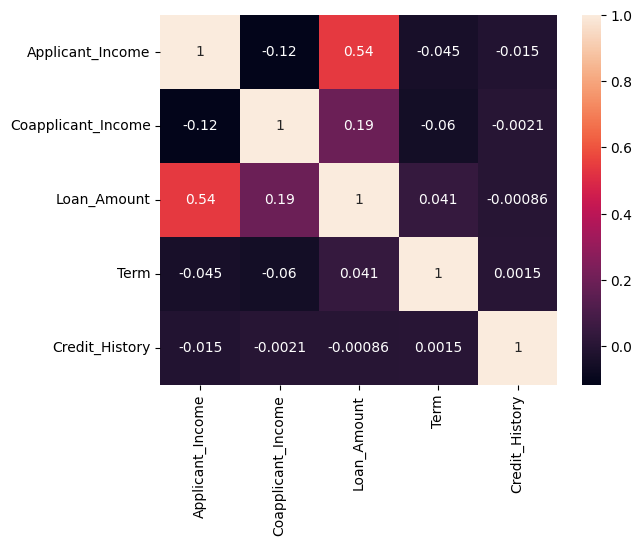

In [10]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [11]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  


*   'Credit_History'열에 있는 결측값도 함께 제거합니다.

참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.




In [12]:
## 문제 1 ##
# 코드 작성

# data frame에서 모든 categorical features 찾기
categorical_features = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)

# categorical features와 'Credit_History'열에 있는 결측값이 있는 행 삭제
df = df.dropna(subset=categorical_features + ['Credit_History'])

##########

## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [15]:
## 문제 2 ##
# 코드 작성

# label encode categorical features
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

##########

<ipython-input-15-42b9e6aa3a16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-15-42b9e6aa3a16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-15-42b9e6aa3a16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [16]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.


* categorical feature와 imputer를 적용하려고 하는 feature(term)를 제외하고, 나머지 numerical feature에 대해서 normalization을 수행한 다음 imputation을 진행해주세요. (imputation을 할 때에만 normalized된 feature들을 사용합니다)
* **주의)** 'Credit_History'는 categorical feature로 간주하여야 합니다.
* term의 결측치를 채울 때에는 'normalized_df'를 사용하고 원본 데이터프레임의 'term' 열만 knn imputer로 결측치를 채운 'term'열로 변경합니다.
* 문제3번 이후 문제에서는 term의 결측치를 채운 변경된 df를 이용합니다.



### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 참고) 거리를 구할 때 데이터에 null 값이 있으면 거리가 nan으로 계산이 됩니다. 따라서 null인 데이터가 있는 행을 제외하고 거리를 계산하거나 모든 거리를 계산하고 nan 을 가진 데이터는 k개를 고를 때 제외해주시면 됩니다.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [17]:
import tqdm

In [18]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
      
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################

        # "feat_name"의 k개 값을 확인하고 평균화하여 값을 결정
        neighbors = [X.iloc[x[0]][feat_name] for x in sorted_dist[:self.k] if not np.isnan(X.iloc[x[0]][feat_name])] # feat_name이 아닌 상위 k개 행 선택
        if len(neighbors) > 0:
              X[feat_name].iloc[i] = np.mean(neighbors) #결측값을 이웃 평균으로 asign

    return X

        ################ 코드 끝  ######################
        ##############################################
        
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]

    X = X.drop([feat_name], axis=1)
    y = y.drop([feat_name])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################

      if i != y.name: #결측값이 있는 현재 행 제외
            dist = np.sqrt(np.sum((X.iloc[i]-y)**2))
            dist_dict[i] = dist
      else:
            dist_dict[i] = np.nan #결측값이 있는 행과 행이 같은 경우
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [19]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(3)
imputer.fit(df)

# test set에 대해 predict를 진행합니다.
imputer.predict(df, 'Term')

  0%|          | 0/511 [00:00<?, ?it/s]<ipython-input-18-0efb7cfdc751>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feat_name].iloc[i] = np.mean(neighbors) #결측값을 이웃 평균으로 asign
  6%|▌         | 30/511 [00:00<00:10, 47.55it/s]<ipython-input-18-0efb7cfdc751>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feat_name].iloc[i] = np.mean(neighbors) #결측값을 이웃 평균으로 asign
  7%|▋         | 37/511 [00:01<00:15, 30.50it/s]<ipython-input-18-0efb7cfdc751>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


In [20]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술

---


: Credit_History, 0.55 값으로 가장 영향을 주는 것을 확인할 수 있다.

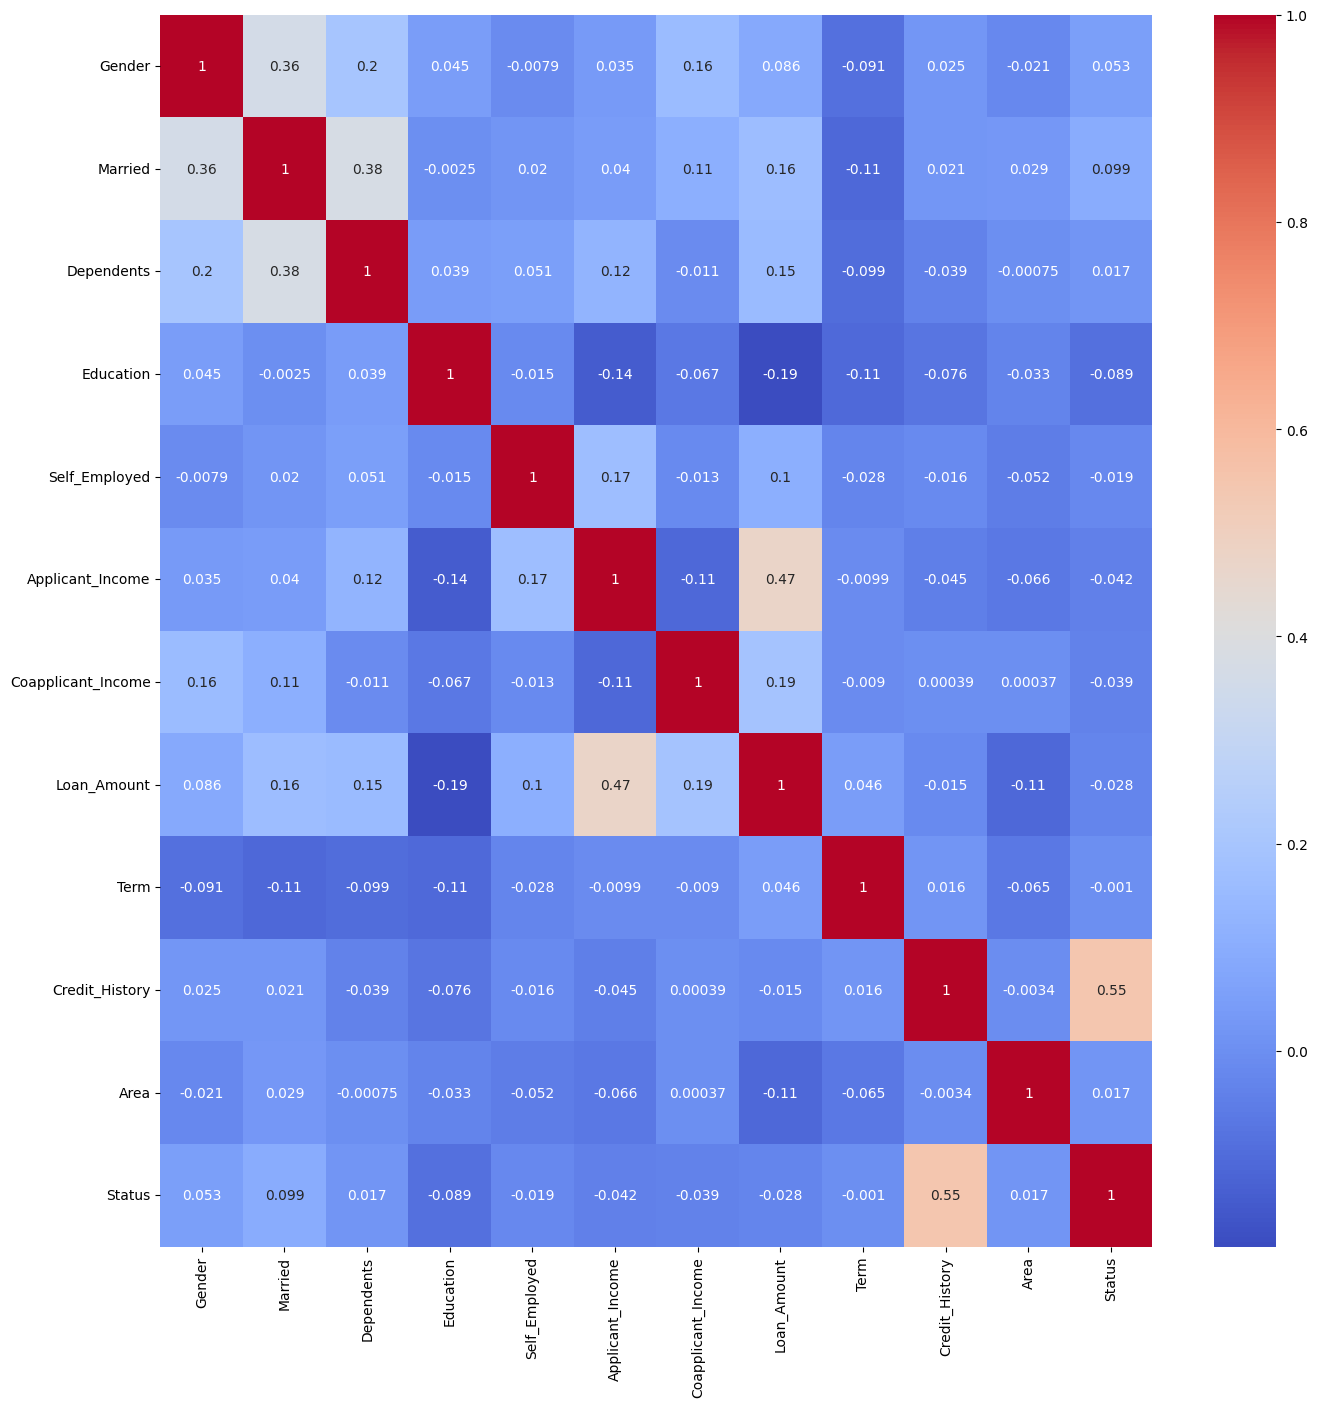

In [21]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [22]:
from sklearn.model_selection import train_test_split

# random seed 설정
random_seed = 42

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=random_seed)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (408, 11)
y_train's shape :  (408,)

X_val's shape :  (51, 11)
y_val's shape :  (51,)

X_test's shape :  (52, 11)
y_test's shape :  (52,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

Optimal parameters: {'metric': 'manhattan', 'n_neighbors': 7}


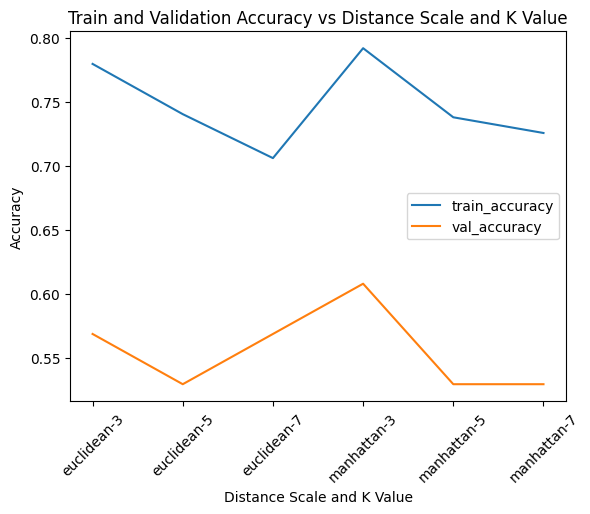

Test accuracy: 0.635
0.6346153846153846


In [24]:
### 문제 1 ###
### 코드 작성 ###
    
# Set the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
     'metric': ['euclidean', 'manhattan']
}
    
# KNN classifier 생성
knn = KNeighborsClassifier()
    
# grid search을 수행하여 최적 매개 변수 찾기
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
    
# optimal parameters 출력
print("Optimal parameters: {}".format(grid_search.best_params_))
    
# optimal parameters를 사용하여 KNN classifier train하기
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                            metric=grid_search.best_params_['metric'])
knn.fit(X_train, y_train)
    
# 각 거리 척도 및 K 값에 대한 train 및 검증 정확도 계산
train_accuracy = []
val_accuracy = []
for metric in param_grid['metric']:
    for k in param_grid['n_neighbors']:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        val_accuracy.append(knn.score(X_val, y_val))
    
# 거리 척도 및 K 값에 따른 train 및 검증 정확도 그래프 그리기
fig, ax = plt.subplots()
ax.plot(train_accuracy, label='train_accuracy')
ax.plot(val_accuracy, label='val_accuracy')
ax.set_xticks(range(len(param_grid['metric'])*len(param_grid['n_neighbors'])))
ax.set_xticklabels(['euclidean-3', 'euclidean-5', 'euclidean-7', 'manhattan-3', 'manhattan-5', 'manhattan-7'], rotation=45)
ax.set_xlabel('Distance Scale and K Value')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Validation Accuracy vs Distance Scale and K Value')
ax.legend()
plt.show()
    
# 최적 파라미터 및 테스트 세트를 사용하여 테스트 정확도 계산
test_accuracy = knn.score(X_test, y_test)
print("Test accuracy: {:.3f}".format(test_accuracy))
  
print(test_accuracy)

################

**설명 작성**  
- 최적의 파라미터: {'metric': 'manhattan', 'n_neighbors': 7}
- 설명: 이 코드는 KNN 분류기에 대한 최적의 하이퍼파라미터를 찾기 위해 교차 검증과 함께 그리드 검색을 수행한다. 검색된 하이퍼파라미터는 이웃 수(n_neighbors)와 거리 메트릭(metric)이다. 그리드 검색이 완료되면 최적의 하이퍼파라미터가 출력되고 이 하이퍼파라미터로 새로운 KNN 분류기가 학습된다. 이 코드는 또한 n_neighbors 및 메트릭의 각 조합에 대한 train 및 유효성 검사 정확도의 그래프를 생성한다. 마지막으로 test set을 사용하여 최적의 하이퍼파라미터를 가진 KNN 분류기의 테스트 정확도를 계산한다. 이 경우 최적의 하이퍼파라미터는 n_neighbors 값이 7이고 거리 메트릭이 'manhattan'입니다.

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [25]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Optimal parameters: 0.001
Test accuracy with optimal parameter: 0.6153846153846154


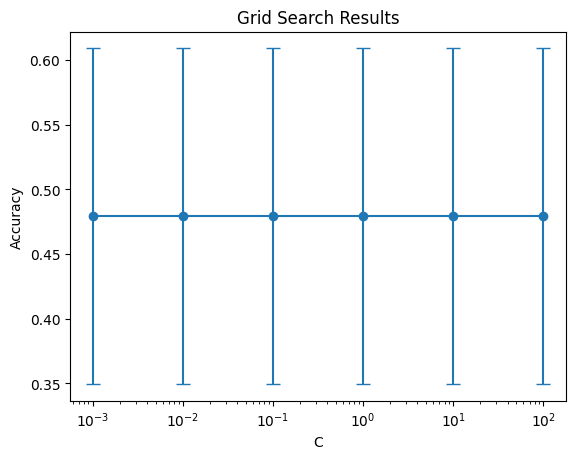

In [26]:
## 문제 6-1 ##
# 코드 작성
import matplotlib.pyplot as plt

# 검색할 C 값 범위 정의
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
# training data의 90%와 validation 데이터의 10%로 5-fold cross-validation을 위한 KFold 개체 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_size = int(X.shape[0] * 0.9)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

#linear SVM 및 5-fold cross-validation을 사용하여 그리드 검색 개체 생성
grid_search = GridSearchCV(LinearSVC(random_state=42), param_grid, cv=kf, scoring='accuracy')

# grid search object를 데이터에 맞춤
grid_search.fit(X_train, y_train)

# best parameters 와 test accuracy 출력
print("Optimal parameters:", grid_search.best_params_['C'])
print("Test accuracy with optimal parameter:", grid_search.score(X_test, y_test))

# 5-fold CV를 통해 얻은 평균 정확도 그래프와 각 C 값에 대한 각 접힘의 정확도 그래프를 표시
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
plt.errorbar(param_grid['C'], means, yerr=stds, fmt='o-', capsize=5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Grid Search Results')
plt.show()

############

**설명 작성**  
- 최적의 파라미터: 0.001
- 설명: 파라미터 C의 최적 값은 0.001인 것으로 나타났다. 이 값은 훈련용 데이터의 90%와 검증용 데이터의 10%로 5-fold cross-validation을 사용하여 C 값 범위(0.001, 0.01, 0.1, 1, 10, 100)에 대해 그리드 검색을 수행하여 얻었다. 그런 다음 training 데이터에서 C의 최적 값으로 모델을 훈련하고 test 데이터에서 평가하여 0.6154의 테스트 정확도를 얻었다. 그래프를 보면 C의 값이 낮을수록 더 잘 수행되는 경향이 있음을 나타냅니다.



In [ ]:
## 문제 6-2 ##
# 코드 작성
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# 데이터를 training과 test sets으로 나누기
train_size = int(X.shape[0] * 0.9)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# 검색할 하이퍼 파라미터 범위 정의
param_distributions = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# leave-one-out 객체 생성
loo = LeaveOneOut()

# 데이터에 대한 임의 검색 개체 정의
rs = RandomizedSearchCV(LinearSVC(max_iter=100000), param_distributions, cv=loo, scoring='accuracy', n_iter=10)

# 데이터에 임의 검색 개체 적합
rs.fit(X_train, y_train)

# 최상의 파라미터와 그에 상응하는 테스트 정확도 출력
print("Optimal parameters:", rs.best_params_)
print("Test accuracy with optimal parameter:", rs.score(X_test, y_test))

# Leave-One-Out CV를 통해 얻은 평균 정확도 그래프 표시
means = rs.cv_results_['mean_test_score']
stds = rs.cv_results_['std_test_score']
params = rs.cv_results_['params']
plt.errorbar(param_distributions['C'], means, yerr=stds, fmt='o-', capsize=5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Randomized Search Results')
plt.show()
# loo = LeaveOneOut()

# C_list = [0.001, 0.01, 0.1, 1, 10, 100]

# mean_scores = []

# for C in C_list:
#   scores = []
#   for train_index, val_index in loo.split(X_train):
#     X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
#     y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
#     clf = LinearSVC(C=C)
#     clf.fit(X_train_fold, y_train_fold)
#     score = clf.score(X_val_fold, y_val_fold)
#     scores.append(score)

#   mean_score = np.mean(scores)
#   mean_scores.append(mean_score)

# for i, C in enumerate(C_list):
#   print("C = ", C, ": Mean cross-validation accuracy = ", mean_scores[i])

# plt.plot(C_list, mean_scores, market='o')
# plt.xscale('log')
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title('Leave-One-Out Cross Validation Scores')
# plt.show()

# best_C = C_list[np.argmax(mean_scores)]
# print(f"Best C value : {best_C}")

# clf = LinearSVC(C=best_C)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy :", test_accuracy)
############

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear

**설명 작성**  
- 최적의 파라미터: 1
- 설명:이 코드에서 최적의 C 값은 1으로 나타났고 이 최적의 매개변수를 사용한 테스트 정확도는 0.8이었다. 이는 모델이 이 C 값을 사용하여 테스트 세트에서 80% 정확도를 달성했음을 의미합니다.

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


In [ ]:
## 문제 7-1 ##
# 코드 작성
from sklearn.exceptions import ConvergenceWarning
import warnings

# 경고 메시지 무시
warnings.filterwarnings("ignore")

# 검색할 감마 값의 범위 정의
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# training data의 90%와 validation 데이터의 10%로 5-fold cross-validation을 위한 KFold 개체 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_size = int(X.shape[0] * 0.9)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# RBF 커널 및 5-fold cross-validation을 사용하는 SVM을 사용하여 그리드 검색 개체 생성
grid_search = GridSearchCV(SVC(kernel='rbf', C=2, random_state=42), param_grid, cv=kf, scoring='accuracy')

# 그리드 검색 개체를 데이터에 맞춤
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search.fit(X_train, y_train)

# 최상의 파라미터와 그에 상응하는 테스트 정확도
print("Optimal parameters:", grid_search.best_params_['gamma'])
print("Test accuracy with optimal parameter:", grid_search.score(X_test, y_test))

# 5-fold CV를 통해 얻은 평균 정확도 그래프와 각 감마 값에 대한 각 접힘의 정확도 그래프 표시
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
plt.errorbar(param_grid['gamma'], means, yerr=stds, fmt='o-', capsize=5)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Grid Search Results')
plt.show()
############

In [ ]:
## 문제 7-2 ##
# 코드 작성
# Split the data into training and test sets
train_size = int(X.shape[0] * 0.9)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define the range of C values to search over
param_grid = {'C': [2]}

# Define the cross-validation strategy using Leave-One-Out with 90% of data for training
loo = LeaveOneOut()
cv = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=loo, scoring='accuracy')

# Fit the grid search object to the data
cv.fit(X_train, y_train)

# Print the best parameters and the corresponding test accuracy
print("Optimal parameters:", cv.best_params_)
print("Test accuracy with optimal parameter:", cv.score(X_test, y_test))

# Plot the graph of average accuracies obtained through Leave-One-Out CV
means = cv.cv_results_['mean_test_score']
stds = cv.cv_results_['std_test_score']
params = cv.cv_results_['params']
plt.errorbar(param_grid['C'], means, yerr=stds, fmt='o-', capsize=5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Grid Search Results')
plt.show()
############

**7-3 설명 작성**  
- 설명: 5-fold cross-validation을 사용하여 얻은 정확도는 C의 두 가지 값에 대해 각각 0.65와 0.9였다. 이는 모델의 성능이 하이퍼파라미터의 선택에 민감하고 C의 최적 값이 학습 및 테스트에 사용되는 데이터의 특정 하위 집합에 따라 달라질 수 있음을 나타낸다. 

반면에 Leave-One-Out cross-validation을 사용할 때 두 모델 모두 1.0의 완벽한 정확도를 달성했다. 이는 주어진 데이터 세트가 두 클래스 사이에 명확한 분리 경계를 가질 수 있으며 적절한 하이퍼파라미터가 있는 Linear SVM에 의해 잘 캡처될 수 있음을 시사한다. 그러나 Leave-One-Out cross-validation이 특정 데이터 세트에 과대적합되었을 수 있고 보이지 않는 새로운 데이터에 잘 일반화되지 않을 수 있다는 점에 유의하는 것이 중요하다.

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
## 문제 8-1 ##
## 코드 작성 ##

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
############

### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
## 문제 8-2 ##
## 코드 작성 ##

# Create the final classifier with the best hyperparameters
clf = RandomForestClassifier(**grid_search.best_params_)

# Train the final classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Compute the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)
############